# Track positions of the investment companies. 
Companies that are present in the following analysis: [Ark Invest](https://ark-invest.com/), [BlackRock](https://www.ishares.com/us), [Invesco](https://www.invesco.com/us/financial-products/etfs/performance), [Global X](https://www.globalxetfs.com/).

After the analysis of the companies' portfolios we are going to leverage ideas of James O'Shaughnessy from his book 'What works on Wall Streat' to choose the best stocks from the ETFs with the growth potential according to his growth strategy.

In [ ]:
author = 'Nikolai Melnikov'
author_url = 'https://www.linkedin.com/in/nikolaimelnikov/'

Imporing all the necessary libraries for the project

In [ ]:
!pip install -U git+https://github.com/mariostoev/finviz

In [ ]:
import pandas as pd

import requests
from io import StringIO

import finviz
from finviz.screener import Screener

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import nest_asyncio #for finviz screener
nest_asyncio.apply()

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}

# Ark Invest 

**[ARKK](https://ark-funds.com/arkk):** Main ARK's ETF.
**[ARKQ](https://ark-funds.com/arkq):** ARK Autonomous Technology & Robotics.

**[ARKW](https://ark-funds.com/arkw):** ARK Next Generation Internet.
**[ARKG](https://ark-funds.com/arkg):** ARK Genomic Revolution.

**[ARKF](https://ark-funds.com/fintech-etf):** ARK FinTech Innovation.
**[PRNT](https://ark-funds.com/3d-printing-etf):** The 3D Printing.

In [ ]:
ark_holdings = {
    'url_arkk': 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv',
    'url_arkq': 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_AUTONOMOUS_TECHNOLOGY_&_ROBOTICS_ETF_ARKQ_HOLDINGS.csv',
    'url_arkw': 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_NEXT_GENERATION_INTERNET_ETF_ARKW_HOLDINGS.csv',
    'url_arkg': 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_GENOMIC_REVOLUTION_MULTISECTOR_ETF_ARKG_HOLDINGS.csv',
    'url_arkf': 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_FINTECH_INNOVATION_ETF_ARKF_HOLDINGS.csv',
    'url_prnt': 'https://ark-funds.com/wp-content/fundsiteliterature/csv/THE_3D_PRINTING_ETF_PRNT_HOLDINGS.csv'
}

ark = pd.DataFrame(columns=['fund', 'shares', 'market value($)', 'weight(%)'])
for url in ark_holdings.values():
  req = requests.get(url, headers=headers)
  url_data = StringIO(req.text)
  df = pd.read_csv(url_data)
  df['ticker'] = df['ticker'].str.split(' ').str[0]
  df.set_index('ticker', inplace=True)
  df.drop(['date','cusip','company'], axis=1, inplace=True)
  df.dropna(inplace=True)
  ark = pd.concat([ark, df])

In [ ]:
ark['total_value($)'] = ark.groupby(ark.index)['market value($)'].sum()
ark['total_shares'] = ark.groupby(ark.index)['shares'].sum()
ark = ark[~ark.index.duplicated(keep='first')]
ark.drop(['fund','shares','market value($)','weight(%)'], axis=1, inplace=True)
ark.dropna(inplace=True)
ark['weight(%)'] = ark.apply(lambda x: (x['total_value($)']/ark['total_value($)'].sum())*100 , axis=1)
ark.sort_values(by=['weight(%)'], ascending=False, inplace=True)

In [ ]:
ark

,total_value($),total_shares,weight(%)
TSLA,3.798489e+09,5429516.0,7.614211
TDOC,2.450088e+09,12326248.0,4.911291
SQ,2.414234e+09,9987730.0,4.839420
ROKU,1.670410e+09,4597373.0,3.348397
Z,1.273608e+09,8098742.0,2.552994
...,...,...,...
3402,5.995756e+05,91708.0,0.001202
DD,5.825955e+05,7577.0,0.001168
LSPD,5.681177e+05,8824.0,0.001139
ROK,3.255560e+05,1232.0,0.000653


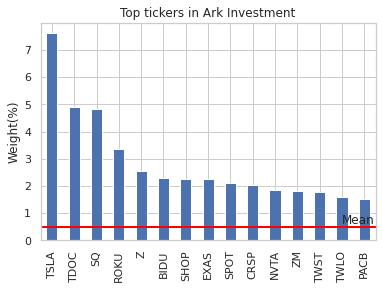

In [ ]:
ax = ark['weight(%)'].head(15).plot(kind='bar')
ax.axhline(ark['weight(%)'].mean(), color='red', linewidth=2, label='Mean')
plt.text(13,0.6,'Mean')
ax.set(ylabel='Weight(%)', title='Top tickers in Ark Investment')
plt.show()

# iShares

**[IWF](https://www.ishares.com/us/products/239706/):** Russell 1000 Growth.
**[IJH](https://www.ishares.com/us/products/239763/):** Core S&P Mid-Cap.

**[IVW](https://www.ishares.com/us/products/239725/):** S&P 500 Growth.
**[QUAL](https://www.ishares.com/us/products/256101/):** MSCI USA Quality Factor.

**[IRBO](https://www.ishares.com/us/products/297905/):** Robotics and Artificial Intelligence Multisector.
**[IBB](https://www.ishares.com/us/products/239699/):** Nasdaq Biotechnology.

**[SOXX](https://www.ishares.com/us/products/239705/):** PHLX Semiconductor.
**[IGV](https://www.ishares.com/us/products/239771/):** Expanded Tech-Software Sector.

**[IXN](https://www.ishares.com/us/products/239750/):** Global Tech.
**[ICLN](https://www.ishares.com/us/products/239738/):** Global Clean Energy.

**[IEMG](https://www.ishares.com/us/products/244050/):** Core MSCI Emerging Markets.

In [ ]:
iShares_holdings = {
    'iwf': 'https://www.ishares.com/us/products/239706/ishares-russell-1000-growth-etf/1467271812596.ajax?fileType=csv&fileName=IWF_holdings&dataType=fund',
    'ijh': 'https://www.ishares.com/us/products/239763/ishares-core-sp-midcap-etf/1467271812596.ajax?fileType=csv&fileName=IJH_holdings&dataType=fund',
    'ivw': 'https://www.ishares.com/us/products/239725/ishares-sp-500-growth-etf/1467271812596.ajax?fileType=csv&fileName=IVW_holdings&dataType=fund',
    'qual': 'https://www.ishares.com/us/products/256101/ishares-msci-usa-quality-factor-etf/1467271812596.ajax?fileType=csv&fileName=QUAL_holdings&dataType=fund',
    'irbo': 'https://www.ishares.com/us/products/297905/fund/1467271812596.ajax?fileType=csv&fileName=IRBO_holdings&dataType=fund',    
    'ibb': 'https://www.ishares.com/us/products/239699/ishares-nasdaq-biotechnology-etf/1467271812596.ajax?fileType=csv&fileName=IBB_holdings&dataType=fund',
    'soxx': 'https://www.ishares.com/us/products/239705/ishares-phlx-semiconductor-etf/1467271812596.ajax?fileType=csv&fileName=SOXX_holdings&dataType=fund',
    'igv': 'https://www.ishares.com/us/products/239771/ishares-north-american-techsoftware-etf/1467271812596.ajax?fileType=csv&fileName=IGV_holdings&dataType=fund',
    'ixn': 'https://www.ishares.com/us/products/239750/ishares-global-tech-etf/1467271812596.ajax?fileType=csv&fileName=IXN_holdings&dataType=fund',
    'icln': 'https://www.ishares.com/us/products/239738/ishares-global-clean-energy-etf/1467271812596.ajax?fileType=csv&fileName=ICLN_holdings&dataType=fund',
    'iemg': 'https://www.ishares.com/us/products/244050/ishares-core-msci-emerging-markets-etf/1467271812596.ajax?fileType=csv&fileName=IEMG_holdings&dataType=fund'
}

iShares = pd.DataFrame(columns=['Market Value', 'Weight (%)', 'Shares'])

for url in iShares_holdings.values():
  req = requests.get(url, headers=headers)
  url_data = StringIO(req.text)
  df = pd.read_csv(url_data, skiprows=9)
  df['Ticker'] = df['Ticker'].str.split(' ').str[0]
  df.set_index('Ticker', inplace=True)
  df.drop(['Name','Sector','Asset Class','CUSIP','ISIN','SEDOL','Location','Exchange','Currency','Market Currency','Accrual Date','Price','FX Rate','Notional Value'], axis=1, inplace=True)
  df.dropna(inplace=True)
  df = df[~df.index.duplicated(keep='first')]
  df = df.replace(',','', regex=True)
  df = df.astype('float64')
  df = df[(df['Market Value'] > 0) & (df['Weight (%)'] > 0)]
  iShares = pd.concat([iShares, df])

In [ ]:
iShares['total_value($)'] = iShares.groupby(iShares.index)['Market Value'].sum()
iShares['total_shares'] = iShares.groupby(iShares.index)['Shares'].sum()
iShares = iShares[~iShares.index.duplicated(keep='first')]
iShares.drop(['Market Value','Weight (%)','Shares'], axis=1, inplace=True)
iShares.dropna(inplace=True)
iShares['weight(%)'] = iShares.apply(lambda x: (x['total_value($)']/iShares['total_value($)'].sum())*100 , axis=1)
iShares.sort_values(by=['weight(%)'], ascending=False, inplace=True)

In [ ]:
iShares

,total_value($),total_shares,weight(%)
AAPL,1.177737e+10,97309529.0,4.146759
MSFT,1.134010e+10,48102218.0,3.992797
AMZN,6.858748e+09,2220026.0,2.414934
2330,4.728601e+09,216872600.0,1.664919
700,4.080464e+09,48715600.0,1.436713
...,...,...,...
WFFUT,1.271027e+06,1271000.0,0.000448
NOK,1.242259e+06,10496470.0,0.000437
SGAFT,1.239000e+06,1239000.0,0.000436
APRE,1.083945e+06,181870.0,0.000382


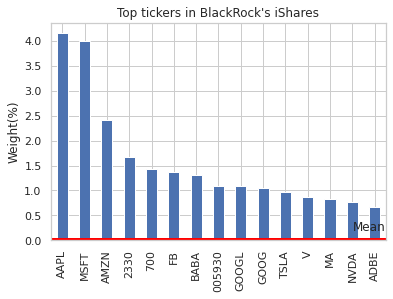

In [ ]:
ax = iShares['weight(%)'].head(15).plot(kind='bar')
ax.axhline(iShares['weight(%)'].mean(), color='red', linewidth=2, label='Mean')
plt.text(13,0.2,'Mean')
ax.set(ylabel='Weight(%)', title='Top tickers in BlackRock\'s iShares')
plt.show()

# Invesco

**[QQQ](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=QQQ):** Includes 100 of the largest international and domestic companies listed on the Nasdaq.
**[PTF](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PTF):** DWA Technology Momentum.

**[PBW](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PBW):** WilderHill Clean Energy.
**[TAN](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=TAN):** Solar.

**[PBE](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PBE):** Dynamic Biotechnology & Genome.
**[PSI](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PSI):** Dynamic Semiconductors.

**[PZD](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PZD):** Cleantech™.
**[PPA](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PPA):** Aerospace & Defense.

**[PYZ](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PYZ):** Basic Materials Momentum.
**[PEZ](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PEZ):** Consumer Cyclicals Momentum.

**[PRN](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PRN):** Industrials Momentum.
**[PTF](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=PTF):** Technology Momentum.

**[SPGP](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=SPGP):** S&P 500 GARP.
**[SPVM](https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Investor&ticker=SPVM):** S&P 500 Value with Momentum.

In [ ]:
invesco_holdings = {
    'qqq': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=QQQ',
    'ptf': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker=PTF',
    'pbw': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker=PBW',
    'tan': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker=TAN',
    'pbe': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker=PBE',
    'psi': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PSI',
    'pzd': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PZD',
    'ppa': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PPA',
    'pyz': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PYZ',
    'pez': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PEZ',
    'prn': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PRN',
    'ptf': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=PTF',    
    'spgp': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=SPGP',
    'spvm': 'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Advisor&action=download&ticker=SPVM'
}


invesco = pd.DataFrame(columns=['MarketValue', 'Weight', 'Shares/Par Value'])

for url in invesco_holdings.values():
  req = requests.get(url, headers=headers)
  url_data = StringIO(req.text)
  df = pd.read_csv(url_data)
  df['Ticker'] = df['Holding Ticker'].str.split(' ').str[0]
  df.drop(['Fund Ticker','Security Identifier','Name','Class of Shares','Sector','Date','Holding Ticker'], axis=1, inplace=True)
  df.set_index('Ticker', inplace=True)
  df = df[~df.index.duplicated(keep='first')]
  df = df.replace(',','', regex=True)
  df = df.astype('float64')
  df = df[(df['MarketValue'] > 0) & (df['Weight'] > 0)]
  invesco = pd.concat([invesco, df])

In [ ]:
invesco['total_value($)'] = invesco.groupby(invesco.index)['MarketValue'].sum()
invesco['total_shares'] = invesco.groupby(invesco.index)['Shares/Par Value'].sum()
invesco = invesco[~invesco.index.duplicated(keep='first')]
invesco.drop(['MarketValue','Weight','Shares/Par Value'], axis=1, inplace=True)
invesco.dropna(inplace=True)
invesco['weight(%)'] = invesco.apply(lambda x: (x['total_value($)']/invesco['total_value($)'].sum())*100 , axis=1)
invesco.sort_values(by=['weight(%)'], ascending=False, inplace=True)

In [ ]:
invesco

,total_value($),total_shares,weight(%)
AAPL,1.669476e+10,137939056.0,10.477889
MSFT,1.444084e+10,61254870.0,9.063289
AMZN,1.255831e+10,4064850.0,7.881789
TSLA,6.650722e+09,9586902.0,4.174094
GOOG,5.509112e+09,2671836.0,3.457603
...,...,...,...
LNT,1.582164e+05,3095.0,0.000099
ES,1.554974e+05,1894.0,0.000098
VZ,1.551521e+05,2789.0,0.000097
MKC,1.542614e+05,1777.0,0.000097


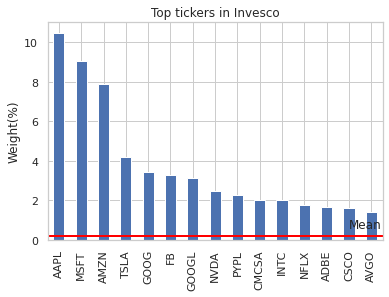

In [ ]:
ax = invesco['weight(%)'].head(15).plot(kind='bar')
ax.axhline(invesco['weight(%)'].mean(), color='red', linewidth=2, label='Mean')
plt.text(13,0.6,'Mean')
ax.set(ylabel='Weight(%)', title='Top tickers in Invesco')
plt.show()

# Global X

**[BOTZ](https://www.globalxetfs.com/funds/botz/):** Robotics & Artificial Intelligence.
**[LIT](https://www.globalxetfs.com/funds/lit/):** Lithium & Battery Tech.

**[CLOU](https://www.globalxetfs.com/funds/clou/):** Cloud Computing.
**[FINX](https://www.globalxetfs.com/funds/finx/):** FinTech.

**[PAVE](https://www.globalxetfs.com/funds/pave/):** U.S. Infrastructure Development.
**[BUG](https://www.globalxetfs.com/funds/bug/):** Cybersecurity.

**[HERO](https://www.globalxetfs.com/funds/hero/):** Video Games & Esports.
**[DRIV](https://www.globalxetfs.com/funds/driv/):** Autonomous & Electric Vehicles.

**[EDOC](https://www.globalxetfs.com/funds/edoc/):** Telemedicine & Digital Health.
**[SNSR](https://www.globalxetfs.com/funds/snsr/):** Internet of Things.

**[EBIZ](https://www.globalxetfs.com/funds/ebiz/):** E-commerce.
**[GNOM](https://www.globalxetfs.com/funds/gnom/):** Genomics & Biotechnology.

**[MILN](https://www.globalxetfs.com/funds/miln/):** Millennials Thematic.
**[RNRG](https://www.globalxetfs.com/funds/rnrg/):** Renewable Energy Producers.

**[BFIT](https://www.globalxetfs.com/funds/bfit/):** Health & Wellness Thematic.
**[VPN](https://www.globalxetfs.com/funds/vpn/):** Data Center REITs & Digital Infrastructure


In [ ]:
globalX_holdings = {
    'botz': 'https://www.globalxetfs.com/funds/botz/?download_full_holdings=true',
    'lit': 'https://www.globalxetfs.com/funds/lit/?download_full_holdings=true',
    'clou': 'https://www.globalxetfs.com/funds/clou/?download_full_holdings=true',
    'finx': 'https://www.globalxetfs.com/funds/finx/?download_full_holdings=true',
    'pave': 'https://www.globalxetfs.com/funds/pave/?download_full_holdings=true',
    'bug': 'https://www.globalxetfs.com/funds/bug/?download_full_holdings=true',
    'hero': 'https://www.globalxetfs.com/funds/hero/?download_full_holdings=true',
    'driv': 'https://www.globalxetfs.com/funds/driv/?download_full_holdings=true',
    'edoc': 'https://www.globalxetfs.com/funds/edoc/?download_full_holdings=true',
    'snsr': 'https://www.globalxetfs.com/funds/snsr/?download_full_holdings=true',
    'ebiz': 'https://www.globalxetfs.com/funds/ebiz/?download_full_holdings=true',
    'gnom': 'https://www.globalxetfs.com/funds/gnom/?download_full_holdings=true',
    'miln': 'https://www.globalxetfs.com/funds/miln/?download_full_holdings=true',
    'rnrg': 'https://www.globalxetfs.com/funds/rnrg/?download_full_holdings=true',
    'bfit': 'https://www.globalxetfs.com/funds/bfit/?download_full_holdings=true',
    'vpn': 'https://www.globalxetfs.com/funds/vpn/?download_full_holdings=true'
}

globalX = pd.DataFrame(columns=['Market Value ($)', '% of Net Assets', 'Shares Held'])

for url in globalX_holdings.values():
  req = requests.get(url, headers=headers)
  url_data = StringIO(req.text)
  df = pd.read_csv(url_data, skiprows=2)
  df.drop(['Name','SEDOL','Market Price ($)'], axis=1, inplace=True)
  df['Ticker'] = df['Ticker'].str.split(' ').str[0]
  df.set_index('Ticker', inplace=True)
  df = df[~df.index.duplicated(keep='first')]
  df = df.replace(',','', regex=True)
  df = df.astype('float64')
  df = df[(df['Market Value ($)'] > 0) & (df['% of Net Assets'] > 0)]
  df.dropna(inplace=True)
  globalX = pd.concat([globalX, df])

In [ ]:
globalX['total_value($)'] = globalX.groupby(globalX.index)['Market Value ($)'].sum()
globalX['total_shares'] = globalX.groupby(globalX.index)['Shares Held'].sum()
globalX = globalX[~globalX.index.duplicated(keep='first')]
globalX.drop(['Market Value ($)','% of Net Assets','Shares Held'], axis=1, inplace=True)
globalX.dropna(inplace=True)
globalX['weight(%)'] = globalX.apply(lambda x: (x['total_value($)']/globalX['total_value($)'].sum())*100 , axis=1)
globalX.sort_values(by=['weight(%)'], ascending=False, inplace=True)

In [ ]:
globalX

,total_value($),total_shares,weight(%)
ALB,3.639343e+08,2313926.0,2.532488
NVDA,2.615641e+08,508642.0,1.820130
ABBN,2.071713e+08,6763277.0,1.441631
6954,1.951638e+08,781121.0,1.358075
ISRG,1.763932e+08,240321.0,1.227457
...,...,...,...
BRBR,1.145060e+05,4399.0,0.000797
1736,1.089377e+05,34200.0,0.000758
1686,1.072834e+05,106681.0,0.000747
9802,8.648401e+04,21086.0,0.000602


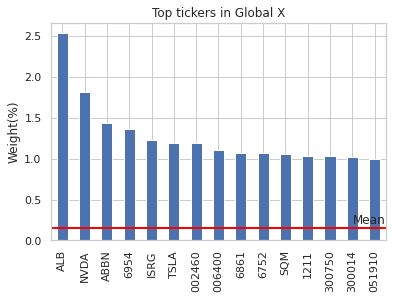

In [ ]:
ax = globalX['weight(%)'].head(15).plot(kind='bar')
ax.axhline(globalX['weight(%)'].mean(), color='red', linewidth=2, label='Mean')
plt.text(13,0.2,'Mean')
ax.set(ylabel='Weight(%)', title='Top tickers in Global X')
plt.show()

# Combined ETF

MOST OCURRING TICKERS AND TICKERS THAT ARE OVERSOLD IN THE LAST TIME BUT NOT BY FUNDS



In [ ]:
etfs_list = [ark, iShares, invesco, globalX]
etfs = pd.concat(etfs_list)

In [ ]:
etfs['Total Value($)'] = etfs.groupby(etfs.index)['total_value($)'].sum()
etfs['Total Shares'] = etfs.groupby(etfs.index)['total_shares'].sum()
etfs = etfs[~etfs.index.duplicated(keep='first')]
etfs.drop(['total_value($)','weight(%)','total_shares'], axis=1, inplace=True)
etfs.dropna(inplace=True)
etfs['Weight(%)'] = etfs.apply(lambda x: (x['Total Value($)']/etfs['Total Value($)'].sum())*100 , axis=1)
etfs.sort_values(by=['Weight(%)'], ascending=False, inplace=True)

In [ ]:
etfs.head(15) #combined etf

,Total Value($),Total Shares,Weight(%)
AAPL,2.857846e+10,236122061.0,5.630062
MSFT,2.586142e+10,109697856.0,5.094795
AMZN,1.952807e+10,6320622.0,3.847102
TSLA,1.336352e+10,19217341.0,2.632663
FB,9.270614e+09,34530433.0,1.826345
GOOG,8.634237e+09,4185855.0,1.700977
GOOGL,8.112254e+09,3957177.0,1.598144
NVDA,6.544926e+09,12723515.0,1.289375
PYPL,6.047738e+09,24119186.0,1.191427
2330,4.728601e+09,216872600.0,0.931552


## Here we use FinViz scanner to scan for the stocks with low Price-to-Book ratio.

James O'Shaughnessy in his book 'What works on Wall Streat' suggests to use companies with a value of P/B under 1.4, FinViz does not give an oppotuinity to use exactly 1.4, that's why we are going to use a value of 2. Also we are leveraging price-to-cashflow here. 

In [ ]:
filters_growth = ['fa_pb_u2','fa_pfcf_u20','cap_smallover','fa_pe_u40']  
stock_list_growth = Screener(filters=filters_growth, table='Valuation', order='Volume') 
stock_list_growth.to_csv("stocks_growth.csv")
stocks_growth = pd.read_csv('stocks_growth.csv', index_col=['Ticker'])

In [ ]:
stocks_growth.tail(10)

,No.,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
Ticker,,,,,,,,,,,,,,,,,
CVS,282,94.88B,13.51,9.11,3.58,0.35,1.40,8.74,8.78,7.60%,8.19%,3.30%,3.77%,11.90%,73.92,2.17%,"6,281,234"
GNW,283,1.79B,2.54,2.96,0.51,0.21,0.12,0.67,0.91,59.20%,24.66%,40.10%,5.00%,0.20%,3.55,0.28%,"6,541,077"
RF,284,20.60B,21.26,11.60,-,4.83,1.27,1.15,12.91,-31.50%,1.73%,6.30%,-,3.40%,21.86,1.96%,"7,788,634"
GGB,285,7.95B,19.56,9.55,3.66,1.00,1.50,5.75,9.82,96.20%,65.81%,20.30%,5.35%,0.10%,4.91,-1.92%,"8,505,819"
GOLD,286,35.89B,15.55,15.28,0.64,2.85,1.55,6.92,12.75,-42.10%,0.23%,20.50%,24.20%,6.90%,20.32,0.05%,"12,694,055"
VST,287,9.10B,14.20,10.27,0.62,0.80,1.08,22.41,5.02,-30.20%,130.21%,16.20%,22.90%,16.30%,18.40,-2.18%,"12,752,376"
KGC,288,8.57B,6.36,6.50,-,2.03,1.28,7.08,8.23,71.20%,38.87%,25.70%,-7.30%,6.70%,6.73,-1.17%,"13,027,329"
GM,289,81.17B,13.71,9.49,1.16,0.66,1.89,2.80,7.58,-5.30%,20.45%,-6.00%,11.84%,-2.00%,59.26,5.20%,"29,755,497"
ITUB,290,44.79B,13.97,8.98,9.31,1.92,1.83,0.24,5.36,-30.40%,16.09%,-4.80%,1.50%,-2.70%,4.86,-1.22%,"36,297,054"


In [ ]:
tickers = stocks_growth.index.to_list()
buys = etfs[etfs.index.isin(tickers)][(etfs['Weight(%)'] > 0.01)]
buys['Weight(%)'] = buys.apply(lambda x: (x['Total Value($)']/buys['Total Value($)'].sum())*100 , axis=1)
buys['Price']=stocks_growth[stocks_growth.index.isin(tickers)]['Price']

In [ ]:
buys.head(10)

,Total Value($),Total Shares,Weight(%),Price
AEP,4.959833e+08,6120228.0,8.422908,81.04
RS,2.794379e+08,1828423.0,4.745482,152.83
JLL,2.375788e+08,1351415.0,4.034620,175.80
RNR,2.310630e+08,1393121.0,3.923968,165.86
RGA,2.309143e+08,1789617.0,3.921442,129.03
AFG,2.182258e+08,1852983.0,3.705963,117.77
ARW,2.094893e+08,1990019.0,3.557598,105.27
SF,2.017623e+08,4537711.0,3.426377,67.23
PB,1.962246e+08,2438179.0,3.332334,80.48
JEF,1.804764e+08,5455756.0,3.064894,33.08


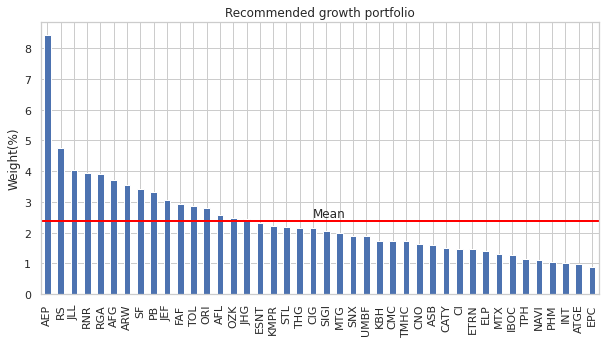

In [ ]:
plt.figure(figsize=(10,5))
ax = buys['Weight(%)'].sort_values(ascending=False).plot(kind='bar')
ax.axhline(buys['Weight(%)'].mean(), color='red', linewidth=2, label='Mean')
plt.text(20,2.5,'Mean')
ax.set(ylabel='Weight(%)', title='Recommended growth portfolio')
plt.show()

NON US STOCKS

In [ ]:
etfs[etfs.index.str.isdigit()].head(5) #Stocks on Foreign Stocks Markets that are hard to buy but worth mentioning.

,Total Value($),Total Shares,Weight(%)
2330,4.728601e+09,216872600.0,0.931552
700,4.080464e+09,48715600.0,0.803867
005930,3.120353e+09,42722080.0,0.614721
3690,1.405871e+09,32708782.0,0.276962
939,6.718288e+08,815238000.0,0.132353


# After we analyzed ETFs and compared stocks in them with a simple FinViz' screener we got a portfolio, where weight of the each stock is equal to the weight of the stock in the complete ETFs portfolio. It is not a financial advise, leverage the acquired insight in your own further analysis.